In [1]:
# Import relevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm2

/var/folders/hx/c878nf113fv7h9m8j458sdbh0000gn/T/ipykernel_2658/2227148257.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('delhi_aqi.csv') # read dataset
df.dropna() # drop missing values
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [4]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [5]:
print(df.isna().sum()) # check if there are any missing values

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [6]:
df = df.drop(['date'], axis = 1) # edit the dataset so there is no time column, so its easy to analyse numerically
df.corr() # print the correlation matrix

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.000000,0.914129,0.764201,-0.402284,0.534227,0.936830,0.950218,0.784951
no,0.914129,1.000000,0.557712,-0.354905,0.498719,0.816441,0.829910,0.724342
no2,0.764201,0.557712,1.000000,-0.343609,0.710371,0.701840,0.711998,0.718399
o3,-0.402284,-0.354905,-0.343609,1.000000,0.013204,-0.286661,-0.294825,-0.275983
so2,0.534227,0.498719,0.710371,0.013204,1.000000,0.488476,0.491889,0.628444
pm2_5,0.936830,0.816441,0.701840,-0.286661,0.488476,1.000000,0.989291,0.644446
pm10,0.950218,0.829910,0.711998,-0.294825,0.491889,0.989291,1.000000,0.686081
nh3,0.784951,0.724342,0.718399,-0.275983,0.628444,0.644446,0.686081,1.000000


In [7]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


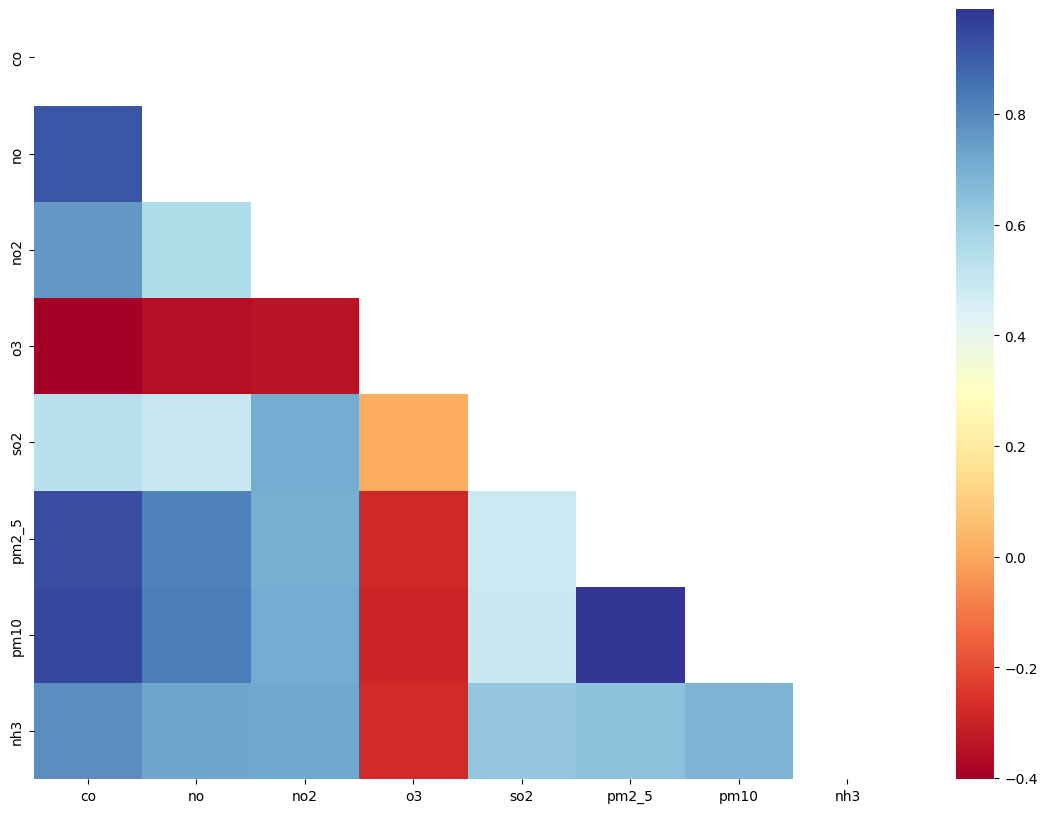

In [23]:
plt.figure(figsize = (14, 10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap = 'RdYlBu', mask = mask, annot = True)
plt.show()

In [9]:
# I am going to choose the NO2 and PM10 pollutants for linear regression analysis, because 
# they seem to have a distinct linear relationship and relatively high positive correlation,
# from which information can be learned.

###### regression 1
predictors = ["co"]
outcome = 'no2'
model = LinearRegression()
model.fit(df[predictors], df[outcome])
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient for no2: {model.coef_[0]:.3f}')

Intercept: 28.166
Coefficient for no2: 0.013


In [10]:
predictors = ["co"]
outcome = 'no2'

# calculate residuals
fitted = model.predict(df[predictors])
residuals = df[outcome] - fitted
print(residuals.head())

# Calculate Root Mean Squared Error.
rmse = np.sqrt(np.mean((df[outcome] - fitted)**2))
print(f'RMSE: {rmse:.2f}')

0     8.436600
1    13.763923
2    12.938876
3    23.898876
4    32.840385
Name: no2, dtype: float64
RMSE: 31.30


In [11]:
# Create simple linear regressiosn model.
mod=sm.ols(formula='df["co"]~df["no2"]',data=df)
res=mod.fit()   
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               df["co"]   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                 2.636e+04
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:42:04   Log-Likelihood:            -1.6780e+05
No. Observations:               18776   AIC:                         3.356e+05
Df Residuals:                   18774   BIC:                         3.356e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.5801     22.732     -2.093      0.0

In [12]:
"""df_eval_simplemodel_metrics = pd.DataFrame( # Create a table with most important metrics for linear regression.
    {
    'R-squared': 0,
    'RMSE': rmse,
    'F-statistic': 1.822e+04,
    'Prob (F-statistic)': 0,
    'AIC': 2.442e+05, 
    }, index = [0])

df_eval_simplemodel_metrics"""

"df_eval_simplemodel_metrics = pd.DataFrame( # Create a table with most important metrics for linear regression.\n    {\n    'R-squared': 0,\n    'RMSE': rmse,\n    'F-statistic': 1.822e+04,\n    'Prob (F-statistic)': 0,\n    'AIC': 2.442e+05, \n    }, index = [0])\n\ndf_eval_simplemodel_metrics"

In [13]:
# Model 2: add all of the pollutants as variables to the model
# Calculate the metrics of the regression model
X = df[["co","no","o3","so2","pm2_5","pm10","nh3"]]
y = df['no2'] 
 
X = sm2.add_constant(X) 
est = sm2.OLS(y, X).fit() 
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                    no2   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.792e+04
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:42:04   Log-Likelihood:                -80389.
No. Observations:               18776   AIC:                         1.608e+05
Df Residuals:                   18768   BIC:                         1.609e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8431      0.299      2.824      0.0

In [14]:
# Delete pollutants 1 by 1, based on p-values for each pollutant.
# The values with least correlation were dropped first, as there is 
# likely to be more randomness, which shouldn't be included into the model.
# The metrics are then analysedbto achieve the best linear regression model 
# with predictors which have reasonable impact the output of the model.

# Firstly NO2 was deleted from the model, as it is the outcome value.
# Then PM2.5 values were deleted from the model, based on the p-value of 0.097, and 
# also a lower value of F-statistic, 
# which means that the predictor is likely to be due to chance.

# As the p-value didn't change from now on, different metrics were then analysed for
# the model which includes "co","no","o3","so2","pm10","nh3" pollutants. One of the main indicators
# of model performance is R-squared value. The model has the R-squared 
# and adj. R-squared values of 0.87, which means that the model expains 87% of the 
# change in the 'no2' variable, which is good. 

# The F-statistic is directly linked to p-values and is defined as the ratio of two mean square values.
# If the null hypothesis is true, F-value can be expected to have a value close to 1 majority of the time.
# A large F-ratio assumes that the variation among group means is higher than it would be by chance, meaning values are correlated.

# The Prob (F-statistic) value tells 
# us that how likely the model variables have an impact on the model. In this case, 
# the probability of this is zero. 

# Next metric is Log-Likelihood, which is related to p-value. The higher the metric, the better the model fits 
# the actual data. In this case, this value is really high, meaning model has a good fit to test data.

# AIC and BIC metrics are used to evaluate the efficiency of the model, using penalty system
# for using additional predictors. This will be the metric we will rely on to deduct the variables from the model

X = df[["co","no","o3","so2","pm10","nh3"]]
y = df['no2'] 
 

X = sm2.add_constant(X)  
est = sm2.OLS(y, X).fit() 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    no2   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 2.090e+04
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:42:04   Log-Likelihood:                -80390.
No. Observations:               18776   AIC:                         1.608e+05
Df Residuals:                   18769   BIC:                         1.608e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9622      0.290      3.320      0.0

In [15]:
# By deleting air quality metrics from the list one by one and checking the results of the table, 
# the values which could be deleted for the sake of the model's weight in terms of information. 
# It is an alternative model which has negligebly worse results but has 1 variable less compared to previous model.

X = df[["co","no","o3","so2","pm10"]]
y = df['no2'] 
 
X = sm2.add_constant(X) 
est = sm2.OLS(y, X).fit() 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    no2   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 2.499e+04
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:42:04   Log-Likelihood:                -80424.
No. Observations:               18776   AIC:                         1.609e+05
Df Residuals:                   18770   BIC:                         1.609e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8135      0.290      2.808      0.0

In [16]:
# The optimal model includes the "co","no","o3","so2","pm10" pollutants. Compared to the previous model,
# only nh3 value was deleted, as it didn't really impact performance of the model, but increased its weight. 
# The model performs reasonably well witht the R2 value of 0.869, which means that approximately 86.9%
# of the variance in the dependent variable is explained by the independent variables.
# Moreover, high F-statistic and small p-values for coefficients show there is a relationship between
# predictor variables ("co","no","o3","so2","pm10") and target variable.

In [17]:
########################
## now k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

predictors = df[["co","no","o3","so2","pm10"]]
outcome = df['no2']

## define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

## build multiple linear regression model
model = LinearRegression()

## use k-fold CV to evaluate model
score_MAE = cross_val_score(model, predictors, outcome, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

score_MSE = cross_val_score(model, predictors, outcome, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

## view mean absolute error
print("MAE:", mean(absolute(score_MAE)).round(3))
print("RMSE:", sqrt(mean(absolute(score_MSE))).round(3))

# From the output we can see that the mean absolute error (MAE) was 11.53.
# That is, the average absolute error between the model prediction and the actual observed data is 11.53
# In general, the lower the MAE, the more closely a model is able to predict the actual observations.
# Another commonly used metric to evaluate model performance is the root mean squared error (RMSE).
# The following code shows how to calculate this metric:

# From the output we can see that the root mean squared error (RMSE) was 17.6
# The lower the RMSE, the more closely a model is able to predict the actual observations.
# In practice we typically fit several different models and compare the RMSE
# or MAE of each model to decide which model produces the lowest test error rates and is therefore the best model to use.
# Also note that in this example we chose to use k=10 folds, but you can choose however many folds you’d like.
# In practice, we typically choose between 5 and 10 folds because this turns out
# to be the optimal number of folds that produce reliable test error rates.


MAE: 11.528
RMSE: 17.551
